In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.7 MB/s 
     |████████████████████████████████| 189 kB 13.0 MB/s 
     |████████████████████████████████| 46 kB 1.8 MB/s 
     |████████████████████████████████| 1.2 MB 21.9 MB/s 
     |████████████████████████████████| 56 kB 2.2 MB/s 
     |████████████████████████████████| 51 kB 175 kB/s 


MessageError: ignored

In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
load_learner?

In [118]:
!pip3 install aiohttp aiofile

from tqdm import tqdm
import click
import requests;
import os
import time
import shutil
import re;
import json;
from dataclasses import dataclass
import os
import asyncio
import aiohttp  # pip install aiohttp
import aiofile  # pip install aiofiles



@dataclass
class Image:
    url: str
    title: str


def search(keywords, max_results=100):
    url = 'https://duckduckgo.com/';
    params = {
    	'q': keywords
    };

    #   First make a request to above URL, and parse out the 'vqd'
    #   This is a special token, which should be used in the subsequent request
    res = requests.post(url, data=params)
    searchObj = re.search(r'vqd=([\d-]+)\&', res.text, re.M|re.I);

    if not searchObj:
        print("Token Parsing Failed !");
        return -1;

    print("Obtained Token");

    headers = {
        'authority': 'duckduckgo.com',
        'accept': 'application/json, text/javascript, */*; q=0.01',
        'sec-fetch-dest': 'empty',
        'x-requested-with': 'XMLHttpRequest',
        'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'referer': 'https://duckduckgo.com/',
        'accept-language': 'en-US,en;q=0.9',
    }

    params = (
        ('l', 'us-en'),
        ('o', 'json'),
        ('q', keywords),
        ('vqd', searchObj.group(1)),
        ('f', ',,,'),
        ('p', '1'),
        ('v7exp', 'a'),
    )

    requestUrl = url + "i.js";

    my_images = []

    while True:
        while True:
            try:
                res = requests.get(requestUrl, headers=headers, params=params);
                data = json.loads(res.text);
                break;
            except ValueError as e:
                print("Hitting Url Failure - Sleep and Retry: %s", requestUrl);
                time.sleep(5);
                continue;

        for obj in data["results"]:
            my_images.append(Image(url=obj["image"], title=obj["title"]))

            if len(my_images) >= max_results:
                return my_images

        if "next" not in data:
            print("No Next Page - Exiting");
            return my_images

        requestUrl = url + data["next"];

def download_file(url, dest_dir, suffix=""):
    os.makedirs(dest_dir, exist_ok=True)
    name, ext = os.path.splitext(os.path.basename(url))
    
    r = requests.get(url, stream=True)
    r.raise_for_status()
    r.raw.decode_content = True
    with open(os.path.join(dest_dir, f"{name}_{time.time_ns()}_{suffix}{ext}"), "wb") as f:
        shutil.copyfileobj(r.raw, f)

def download_files(urls, dest_dir):
    os.makedirs(dest_dir, exist_ok=True)
    [download_file(url, dest_dir) for url in urls]

def download_files_async(urls, dest_dir):
    os.makedirs(dest_dir, exist_ok=True)
    sema = asyncio.BoundedSemaphore(5)

    pbar = tqdm(total=len(urls), position=0, leave=True)

    async def fetch_file(url):
        nonlocal pbar

        headers = {
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'
            }

        fname = os.path.basename(url)
        async with sema, aiohttp.ClientSession() as session:

            try:
                async with session.get(url, headers=headers) as resp:
                    assert resp.status == 200, resp
                    data = await resp.read()
            except:
                print(f"Timed out downloading {url}")
                return

        async with aiofile.async_open(
            os.path.join(dest_dir, fname), "wb"
        ) as outfile:
            await outfile.write(data)

        pbar.update(1)

    loop = asyncio.get_event_loop()
    tasks = [loop.create_task(fetch_file(url)) for url in urls]
    loop.run_until_complete(asyncio.wait(tasks))
    pbar.close()

def search_and_download(keywords, path, limit):
    download_files_async([i.url for i in search(keywords, limit)], path)


import nest_asyncio
nest_asyncio.apply()



In [5]:
!mkdir -p images/parsely
!mkdir -p images/coriander

In [5]:
!ls -la images/parsely | wc -l

879


In [6]:
search_and_download("parsely", "./images/parsely", 1000)

Obtained Token


  8%|▊         | 78/1000 [00:17<05:29,  2.79it/s]

Timed out downloading http://theherbexchange.com/wp-content/uploads/2017/04/parsley-growing.jpg


 17%|█▋        | 169/1000 [00:34<03:11,  4.34it/s]

Timed out downloading http://cdn.shopify.com/s/files/1/0011/2341/8172/products/PE629-Parsley-Pea-IMG_5860_1024x1024.jpg?v=1523418267


 21%|██        | 211/1000 [00:39<00:55, 14.32it/s]

Timed out downloading https://plants.wasconursery.com/Content/Images/Photos/F771-12.jpg


 25%|██▌       | 253/1000 [00:47<01:43,  7.20it/s]

Timed out downloading https://www.quickcrop.ie/site/uploads/sys_products/parsley-italian-giant.jpg


 27%|██▋       | 267/1000 [00:49<01:23,  8.79it/s]

Timed out downloading https://www.naturesproduce.com/wp-content/uploads/2018/09/italparsley.jpg


 33%|███▎      | 327/1000 [01:01<01:31,  7.32it/s]

Timed out downloading https://splendorgarden.com/wp-content/uploads/2016/06/parsley-flakes-1.jpg


 36%|███▌      | 359/1000 [01:05<01:34,  6.76it/s]

Timed out downloading https://www.freebunni.com/wp-content/uploads/2020/03/parsleytea.jpg


 42%|████▏     | 423/1000 [01:16<01:21,  7.11it/s]

Timed out downloading https://www.jagsfresh.com/media/catalog/product/cache/1/image/1200x1200/9df78eab33525d08d6e5fb8d27136e95/c/u/curly_leaves_parsley_herb_1.jpg


 45%|████▌     | 451/1000 [01:20<01:27,  6.26it/s]

Timed out downloading https://www.bunzlpd.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/3/0/303055401-Parsley-Flakes.jpg


 48%|████▊     | 478/1000 [01:25<01:27,  5.98it/s]

Timed out downloading https://www.your-cup-of-tea.com/image-files/parsley_2.gif


 55%|█████▌    | 552/1000 [01:38<01:23,  5.37it/s]

Timed out downloading http://cdn3.volusion.com/wkav7.pckj3/v/vspfiles/photos/HER-PR01-2T.jpg?1406809798


 62%|██████▏   | 622/1000 [01:55<01:09,  5.43it/s]

Timed out downloading https://www.dutchgardenseeds.co.uk/images/detailed/1/Biologische_zaden_peterselie_gigante_d'italia.jpg


 63%|██████▎   | 626/1000 [01:55<01:09,  5.37it/s]

Timed out downloading https://www.featurepics.com/StockImage/20100726/parsley-stock-picture-1620318.jpg


 68%|██████▊   | 685/1000 [02:09<00:59,  5.32it/s]

Timed out downloading https://www.prestofreshgrocery.com/media/catalog/product/cache/1/image/800x800/9df78eab33525d08d6e5fb8d27136e95/0/0/00052100007380_3.jpg


 72%|███████▏  | 718/1000 [02:15<00:23, 11.79it/s]

Timed out downloading https://www.marketspice.com/300-home_default/parsley-flakes.jpg


 72%|███████▏  | 723/1000 [02:16<00:20, 13.61it/s]

Timed out downloading https://priyakitchenette.com/wp-content/uploads/2014/01/Baked-Parsley-Potato.jpg


 79%|███████▉  | 794/1000 [02:25<00:25,  7.98it/s]

Timed out downloading https://4.bp.blogspot.com/_hlxGFZiqsfg/THeR53ReN_I/AAAAAAAADFo/LXfJXzQiE3Q/s1600/cod+with+parsley+sauce.jpg


 80%|████████  | 801/1000 [02:26<00:18, 11.05it/s]

Timed out downloading https://bivianodirect.com.au/wp-content/uploads/2020/06/products-41C7C819-6AD7-435A-8D73-E5378B8D1543.jpg


 82%|████████▏ | 816/1000 [02:27<00:25,  7.09it/s]

Timed out downloading https://splendorgarden.com/wp-content/uploads/2016/07/parsley-tea.jpg


 82%|████████▏ | 821/1000 [02:28<00:28,  6.35it/s]

Timed out downloading https://i.guim.co.uk/img/static/sys-images/Lifeandhealth/Pix/pictures/2010/7/14/1279115817581/A-bowl-of-parsley-salad-t-003.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctZGVmYXVsdC5wbmc&enable=upscale&s=61e0b528e385a5c6e9b89d0e269c22a1


 83%|████████▎ | 834/1000 [02:30<00:16,  9.80it/s]

Timed out downloading https://i1.wp.com/www.jillsjam.com/wp-content/uploads/2018/05/Parsley-Jelly.jpeg?fit=1200%2C1200&ssl=1


 93%|█████████▎| 931/1000 [02:41<00:11,  6.27it/s]

Timed out downloading https://gardens-advice.com/img/infuso-di-prezzemolo.jpg


 94%|█████████▍| 939/1000 [02:43<00:15,  4.05it/s]

Timed out downloading https://4.bp.blogspot.com/_hlxGFZiqsfg/THeR53ReN_I/AAAAAAAADFo/LXfJXzQiE3Q/w1200-h630-p-k-no-nu/cod+with+parsley+sauce.jpg


 98%|█████████▊| 975/1000 [02:48<00:04,  5.78it/s]


In [7]:
search_and_download("coriander", "./images/coriander", 1000)

Obtained Token


  0%|          | 0/1000 [00:00<?, ?it/s]Task exception was never retrieved
future: <Task finished coro=<download_files_async.<locals>.fetch_file() done, defined at <ipython-input-3-efbd694e8145>:111> exception=IsADirectoryError(21, 'Is a directory')>
Traceback (most recent call last):
  File "/usr/lib/python3.7/asyncio/tasks.py", line 251, in __step
    result = coro.throw(exc)
  File "<ipython-input-3-efbd694e8145>", line 130, in fetch_file
    os.path.join(dest_dir, fname), "wb"
  File "/usr/local/lib/python3.7/dist-packages/aiofile/utils.py", line 193, in __aenter__
    await self.file.open()
  File "/usr/local/lib/python3.7/dist-packages/aiofile/aio.py", line 174, in open
    open, self._fname, self._open_mode,
  File "/usr/lib/python3.7/asyncio/futures.py", line 263, in __await__
    yield self  # This tells Task to wait for completion.
  File "/usr/lib/python3.7/asyncio/tasks.py", line 318, in __wakeup
    future.result()
  File "/usr/lib/python3.7/asyncio/futures.py", line 181, 

Timed out downloading https://microroots.co.uk/wp-content/uploads/2020/09/310B1CED-7014-4AF8-99C5-70FD84CA7347_1_201_a-scaled.jpeg


 19%|█▉        | 191/1000 [00:27<01:12, 11.10it/s]

Timed out downloading http://indiancookingmanual.com/wp-content/uploads/2015/07/DSC_1008-900x554.jpg
Timed out downloading https://sparshotts.co.uk/wp-content/uploads/shutterstock_60335152.jpg-micro-coriander-scaled-1200x803.jpg


 20%|█▉        | 198/1000 [00:28<01:44,  7.66it/s]

Timed out downloading https://sparshotts.co.uk/wp-content/uploads/shutterstock_60335152.jpg-micro-coriander-scaled-1200x803.jpg
Timed out downloading https://opimedia.azureedge.net/-/media/images/men/editorial/blogs/real-food/pickled-green-coriander-seeds-recipe-2/coriander-sq-jpg.jpg


 22%|██▏       | 219/1000 [00:32<02:18,  5.65it/s]

Timed out downloading https://www.searchpng.com/wp-content/uploads/2019/01/Coriander-PNG-1024x1024.png
Timed out downloading https://spiceclubuk.com/wp-content/uploads/2020/04/20200428_105333-scaled.jpg


 26%|██▌       | 256/1000 [00:37<01:22,  9.05it/s]

Timed out downloading https://spiceoflifeorganics.com/wp-content/uploads/2015/12/coriander_ground.png


 33%|███▎      | 330/1000 [00:48<01:24,  7.97it/s]

Timed out downloading https://splendorgarden.com/wp-content/uploads/2017/11/Coriander-Whole.jpg


 60%|██████    | 602/1000 [01:53<00:41,  9.52it/s]

Timed out downloading https://www.blossomsfarm.com/wp-content/uploads/2015/12/CorianderOK.jpg


 61%|██████    | 608/1000 [01:55<01:13,  5.35it/s]

Timed out downloading http://www.greektastes.com/wp-content/uploads/2013/02/Coriander-Coliandros-320x213.jpg


 69%|██████▉   | 688/1000 [02:06<00:53,  5.86it/s]

Timed out downloading https://www.featurepics.com/StockImage/20110927/coriander-stock-picture-2010523.jpg


 69%|██████▉   | 693/1000 [02:07<01:04,  4.76it/s]

Timed out downloading https://www.marketspice.com/203-tm_large_default/coriander-ground.jpg


 72%|███████▏  | 719/1000 [02:11<00:52,  5.34it/s]

Timed out downloading https://www.featurepics.com/StockImage/20110927/coriander-stock-picture-2010523.jpg


 73%|███████▎  | 732/1000 [02:13<00:46,  5.82it/s]

Timed out downloading https://www.marketspice.com/202-tm_thickbox_default/coriander-seed-whole.jpg


 73%|███████▎  | 734/1000 [02:13<00:35,  7.43it/s]

Timed out downloading http://www.deliveryathome.co.in/media/catalog/product/cache/1/thumbnail/9df78eab33525d08d6e5fb8d27136e95/e/v/everest-coriander-_back-sid_3.jpg


 74%|███████▎  | 737/1000 [02:14<00:32,  8.01it/s]

Timed out downloading https://cdn.shopify.com/s/files/1/2512/0574/products/SG_Coriander_ground_4_1024x1024.png?v=1524233703


 77%|███████▋  | 774/1000 [02:18<00:30,  7.37it/s]

Timed out downloading https://d1e3z2jco40k3v.cloudfront.net/-/media/mccormick-us/products/gourmet/c/800/gourmet_organic_coriander_seed_new_800x800.png?rev=4205395b1a1b40f9840c4c35549598a4&vd=20200628T222213Z&hash=B0B0C41799AA6C3AD49531FB4006A842


 78%|███████▊  | 778/1000 [02:19<00:32,  6.86it/s]

Timed out downloading https://sharedkitchen.co.nz/wp-content/uploads/2020/02/Peach-Date-Coriander-Salad-2-600x800.jpg


 80%|███████▉  | 796/1000 [02:22<00:49,  4.16it/s]

Timed out downloading http://www.twocouplescooking.com/wp-content/uploads/2013/01/coriander_potatoes.jpg


 85%|████████▌ | 853/1000 [02:30<00:16,  8.70it/s]

Timed out downloading https://myfoodstory.com/wp-content/uploads/2018/10/Green-Coriander-Chutney-2.jpg


 87%|████████▋ | 873/1000 [02:34<00:25,  5.02it/s]

Timed out downloading https://www.herbalremediesadvice.org/images/Coriander.jpg.pagespeed.ce.I4Cu3bS3wm.jpg


 88%|████████▊ | 876/1000 [02:35<00:32,  3.87it/s]

Timed out downloading https://myfoodstory.com/wp-content/uploads/2018/10/Green-Coriander-Chutney-3.jpg
Timed out downloading https://opimedia.azureedge.net/-/media/images/hgr/editorial/articles/online-articles/2019/10-01/cucumber-lime-and-coriander-seed-gin-recipe/cucumber-lime-coriander-gin-sq-jpg.jpg


 88%|████████▊ | 883/1000 [02:36<00:20,  5.84it/s]

Timed out downloading https://www.marhaba.qa/wp-content/uploads/2020/06/MARHABA-Coriander-Hamour.jpg
Timed out downloading https://myfoodstory.com/wp-content/uploads/2018/10/Green-Coriander-Chutney-3.jpg


 91%|█████████ | 906/1000 [02:40<00:15,  5.94it/s]

Timed out downloading https://www.culpepers.net.au/uploaded/images/products/mintcorchut283-2_322785185.jpg


 97%|█████████▋| 973/1000 [02:54<00:04,  5.58it/s]


In [8]:
def get_y(r):
  return [str(r).split("/")[1]]

In [9]:
leaves = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_y,
    
    item_tfms = RandomResizedCrop(128, min_scale=0.35))

In [10]:
fns = get_image_files("./images")
fns
print(len(fns))
failed = verify_images(fns)
print(len(failed))
failed.map(Path.unlink);

1412


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


13


In [11]:
dls = leaves.dataloaders("./images")

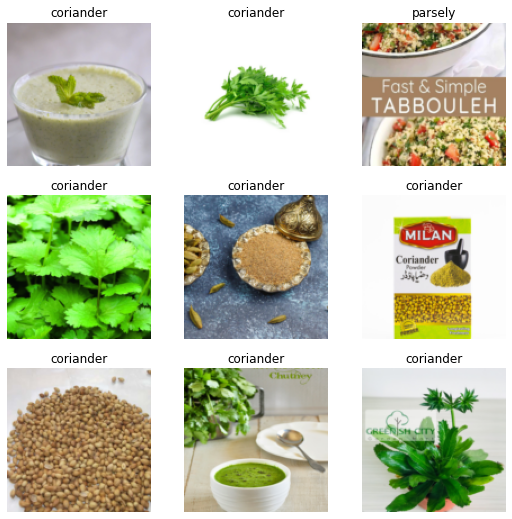

In [14]:
dls.show_batch()

In [ ]:
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when `inp` and `targ` are the same size."
    if sigmoid: inp = inp.sigmoid()
    return ((inp>thresh)==targ.bool()).float().mean()

In [13]:
learn = cnn_learner(dls, resnet50, metrics=accuracy_multi)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.929529,0.706582,0.645390,00:49
1,0.821936,0.845971,0.624114,00:49
2,0.765406,0.886581,0.640071,00:50
3,0.713508,0.865102,0.636525,00:50


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes sh

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.537582,0.809333,0.675532,00:51
1,0.502879,0.904279,0.673759,00:51
2,0.403006,0.800770,0.696809,00:51
3,0.330883,0.798732,0.686170,00:51


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(4, freeze_epochs=4)

In [16]:
from google.colab import files
uploaded = files.upload()

Saving IMDBdata_MainData.csv to IMDBdata_MainData.csv


In [17]:
!ls -la

total 3708
drwxr-xr-x 1 root root    4096 Dec 25 08:51 .
drwxr-xr-x 1 root root    4096 Dec 25 08:36 ..
drwxr-xr-x 4 root root    4096 Dec  3 14:33 .config
drwx------ 6 root root    4096 Dec 25 08:40 gdrive
drwxr-xr-x 4 root root    4096 Dec 25 08:40 images
-rw-r--r-- 1 root root 3771528 Dec 25 08:51 IMDBdata_MainData.csv
drwxr-xr-x 1 root root    4096 Dec  3 14:33 sample_data


In [221]:
import csv
import random

movies = []

with open('IMDBdata_MainData.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            movies.append((row[13], float(row[17])))
            line_count += 1
    print(f'Processed {line_count} lines.')

random.shuffle(movies)

Column names are Title, Year, Rated, Released, Runtime, Genre, Director, Writer, Actors, Plot, Language, Country, Awards, Poster, Ratings.Source, Ratings.Value, Metascore, imdbRating, imdbVotes, imdbID, Type, DVD, BoxOffice, Production, Website, Response, tomatoURL
Processed 5274 lines.


In [112]:
movies[100]

('https://images-na.ssl-images-amazon.com/images/M/MV5BMjQwMTQ0MzgwNl5BMl5BanBnXkFtZTgwNjc4ODE4MzE@._V1_SX300.jpg',
 8.4)

In [34]:
len(movies)

5273

In [38]:
!mkdir /tmp/movies

mkdir: cannot create directory ‘/tmp/movies’: File exists


In [110]:
print(movies[0])

TypeError: ignored

In [168]:
movers = movies
pbar = tqdm(total=len(movers), position=0, leave=True)
failed = []
for movie in movers:
  try:
    download_file(movie[0], "/tmp/movies", f"{movie[1]}")
  except Exception as e:
    failed.append(e)
  pbar.update(1)

pbar.close()
print(f"\nfailed {len(failed)}")

100%|██████████| 5273/5273 [06:28<00:00, 13.57it/s]


failed 338


In [220]:
movers[0]

('https://images-na.ssl-images-amazon.com/images/M/MV5BNzY2NzI4OTE5MF5BMl5BanBnXkFtZTcwMjMyNDY4Mw@@._V1_SX300.jpg',
 8.0)

In [124]:
!ls -la /tmp/movies

total 28
drwxr-xr-x 2 root root  4096 Dec 25 09:26 .
drwxrwxrwt 1 root root  4096 Dec 25 09:26 ..
-rw-r--r-- 1 root root 17734 Dec 25 09:26 MV5BMjIzOTgyNjEzMV5BMl5BanBnXkFtZTcwNzY1ODY2Nw@@._V1_SX300_1640424405744224371_7.0.jpg


In [122]:
#!rm -rf /tmp/movies

In [169]:
fns = get_image_files("/tmp/movies")
fns
len(fns)

5803

In [170]:
failed = verify_images(fns)
print(len(failed))
failed.map(Path.unlink);

0


In [75]:
float(a.stem.split("_")[-1])

1.0

In [127]:
def get_y(r):
  return float(r.stem.split("_")[-1])

In [199]:
movies = DataBlock(
    blocks=(ImageBlock, RegressionBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=get_y,
    item_tfms=Resize(128))

In [200]:
#bears = bears.new(
#    item_tfms=RandomResizedCrop(224, min_scale=0.5),
#    batch_tfms=aug_transforms())
#dls = bears.dataloaders("/tmp/movies")

In [201]:
dls = movies.dataloaders("/tmp/movies")

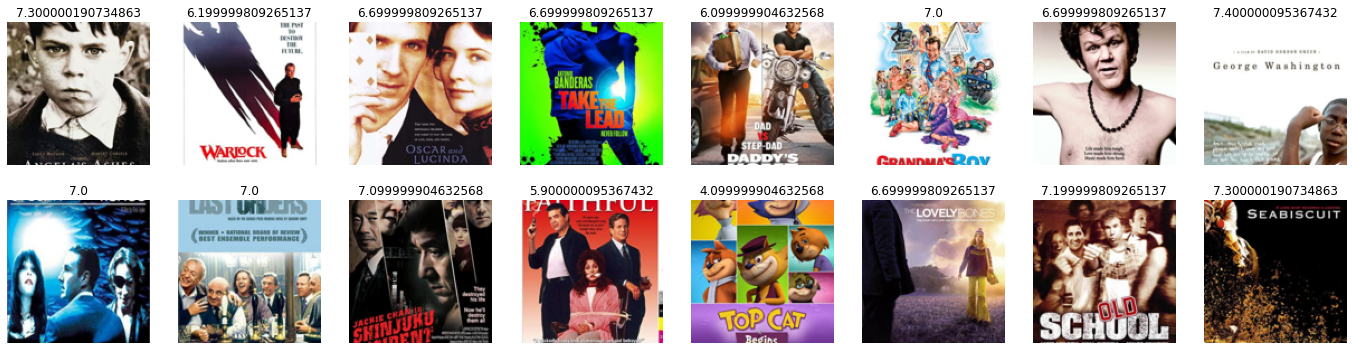

In [202]:
dls.valid.show_batch(max_n=16, nrows=2)

In [203]:
def calc_acc(preds, targs):
  return (preds.view((len(targs))) - targs).abs().mean()

In [204]:
learn = cnn_learner(dls, resnet50, y_range=(0,10), metrics=calc_acc)

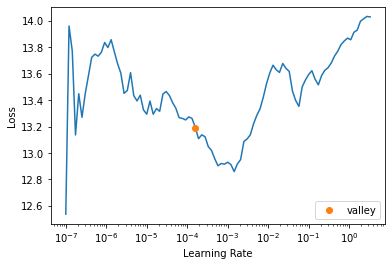

In [205]:
lr = learn.lr_find()

In [206]:
learn.fine_tune(12, lr.valley)

epoch,train_loss,valid_loss,calc_acc,time
0,12.289186,8.450917,2.354715,00:43


epoch,train_loss,valid_loss,calc_acc,time
0,11.328235,7.476663,2.192644,00:56
1,10.748857,7.069460,2.149047,00:56


KeyboardInterrupt: ignored

In [187]:
learn.export("export_resnet34_0_799.pkl")

In [195]:
!ls -la .

total 89236
drwxr-xr-x 1 root root     4096 Dec 25 10:33 .
drwxr-xr-x 1 root root     4096 Dec 25 08:36 ..
drwxr-xr-x 4 root root     4096 Dec  3 14:33 .config
-rw-r--r-- 1 root root 87572523 Dec 25 10:33 export_resnet50_0_799.pkl
drwx------ 6 root root     4096 Dec 25 08:40 gdrive
drwxr-xr-x 4 root root     4096 Dec 25 08:40 images
-rw-r--r-- 1 root root  3771528 Dec 25 08:51 IMDBdata_MainData.csv
drwxr-xr-x 2 root root     4096 Dec 25 10:35 models
drwxr-xr-x 1 root root     4096 Dec  3 14:33 sample_data


In [207]:
from google.colab import files
files.download("./export_resnet50_0_799.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [208]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [212]:
learn_inf = load_learner('export_resnet50_0_799.pkl')

In [214]:
while True:
  time.sleep(1)

KeyboardInterrupt: ignored

In [ ]:
while True:
  time.sleep(1)

In [213]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [262]:
img = PILImage.create(btn_upload.data[-1])
#img

In [263]:
learn_inf.predict(img)

((6.300044536590576), TensorBase([6.3000]), TensorBase([6.3000]))

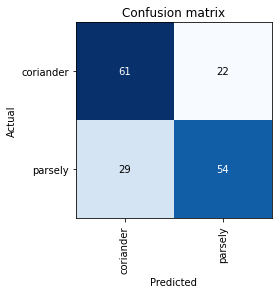

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix() 

In [ ]:
tdef plot_top_losses_fix(interp, k, largest=True, **kwargs):
        losses,idx = interp.top_losses(k, largest)
        if not isinstance(interp.inputs, tuple): interp.inputs = (interp.inputs,)
        if isinstance(interp.inputs[0], Tensor): inps = tuple(o[idx] for o in interp.inputs)
        else: inps = interp.dl.create_batch(interp.dl.before_batch([tuple(o[i] for o in interp.inputs) for i in idx]))
        b = inps + tuple(o[idx] for o in (interp.targs if is_listy(interp.targs) else (interp.targs,)))
        x,y,its = interp.dl._pre_show_batch(b, max_n=k)
        b_out = inps + tuple(o[idx] for o in (interp.decoded if is_listy(interp.decoded) else (interp.decoded,)))
        x1,y1,outs = interp.dl._pre_show_batch(b_out, max_n=k)
        if its is not None:
            #plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), L(self.preds).itemgot(idx), losses,  **kwargs)
            plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), interp.preds[idx], losses,  **kwargs)
        #TODO: figure out if this is needed
        #its None means that a batch knows how to show itself as a whole, so we pass x, x1
        #else: show_results(x, x1, its, ctxs=ctxs, max_n=max_n, **kwargs)


,target,predicted,probabilities,loss
0,parsely,coriander,"TensorBase([[0.9931, 0.0228],\n [0.9750, 0.0154],\n [0.0105, 0.9561],\n [0.8013, 0.0180],\n [0.0253, 0.7382]])",4.377442359924316


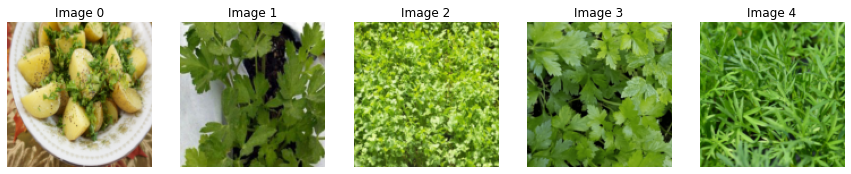

In [18]:
interp.plot_top_losses(5, nrows=1)

In [19]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
#hide
x = 0
for idx in cleaner.delete(): x +=1; cleaner.fns[idx].unlink()
print(x)

1
